In [113]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

# Decision Tree Exercises:

In [2]:
titanic_df = acquire.get_titanic_data()
train, test, validate = prepare.prep_titanic_data(titanic_df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [3]:
#Creating X and y model-testing dataframes:
X_train = train.drop(columns = ['survived'])
y_train = train.survived

X_validate = validate.drop(columns = ['survived'])
y_validate = validate.survived

X_test = test.drop(columns = ['survived'])
y_test = test.survived

## 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
#Quick check to verify that our cleaned data does not contain any null values:
train.isnull().sum()

#There are indeed no nulls. 

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [5]:
train.survived.mode()
#The mode was that a person did not survive, so our baseline would be to guess that someone dies.

train[train['survived'] == 0].shape[0] / train.shape[0]

#Our baseline model would be correct ~62% of the time. 

0.6164658634538153

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 123)

In [7]:
clf = clf.fit(X_train, y_train)

[Text(392.92499999999995, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(241.79999999999998, 237.825, 'pclass <= 2.5\ngini = 0.411\nsamples = 187\nvalue = [54, 133]\nclass = survived'),
 Text(120.89999999999999, 142.695, 'age <= 43.5\ngini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = survived'),
 Text(60.449999999999996, 47.565, 'gini = 0.072\nsamples = 80\nvalue = [3, 77]\nclass = survived'),
 Text(181.35, 47.565, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = survived'),
 Text(362.7, 142.695, 'fare <= 24.808\ngini = 0.498\nsamples = 90\nvalue = [48, 42]\nclass = died'),
 Text(302.25, 47.565, 'gini = 0.493\nsamples = 75\nvalue = [33, 42]\nclass = survived'),
 Text(423.15, 47.565, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = died'),
 Text(544.05, 237.825, 'age <= 3.5\ngini = 0.303\nsamples = 311\nvalue = [253, 58]\nclass = died'),
 Text(483.59999999999997, 142.695, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = surv

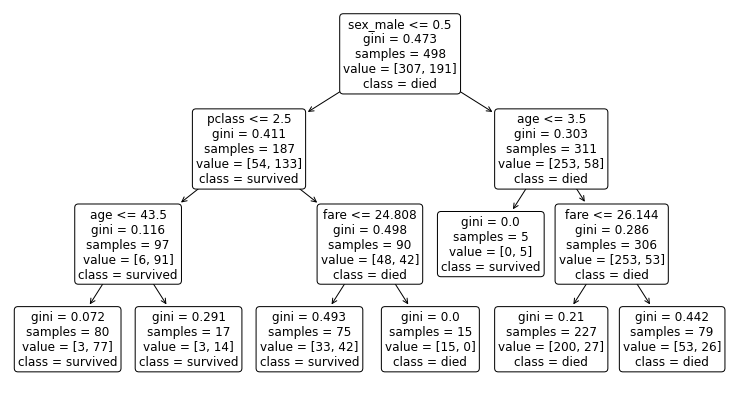

In [8]:
survived = np.array(['died', 'survived'])

plt.figure(figsize = (13,7))
plot_tree(clf, feature_names = X_train.columns, class_names = survived, rounded = True)

### Doing some side-exploration below to break the model apart and understand what I'm looking at:

In [9]:
train[train['sex_male'] == 0].shape[0]

187

In [10]:
train[(train.sex_male == 0) & (train.pclass <= 2.5)].shape[0]

97

In [11]:
train[(train.sex_male == 0) & (train.pclass > 2.5)].shape[0]

90

In [12]:
train[(train.sex_male == 0) & (train.pclass <= 2.5) & (train.age <= 43.5)].shape[0]

80

In [13]:
train[(train.sex_male == 0) & (train.pclass <= 2.5) & (train.age > 43.5)].shape[0]

17

In [14]:
# making predictions on the observations:

y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 1, 1, 0])

## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [15]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,268,39
1,53,138


## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [16]:
#Defining true/false positive and true/false negative:

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

tn, fp, fn, tp

(268, 39, 53, 138)

In [17]:
#Accuracy:

accuracy = accuracy_score(y_train, y_pred)
accuracy

0.8152610441767069

In [18]:
#True Positive Rate:

tp / (tp + fp)

0.7796610169491526

In [19]:
#False Positive Rate:
fp / (tp + fp)

0.22033898305084745

In [20]:
#True Negative Rate:
tn / (tn + fn)

0.8348909657320872

In [21]:
#False Negative Rate:
fn / (tn + fn)

0.16510903426791276

In [22]:
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred)

print(f"Precision is {precision}.")
print(f"Recall is {recall}.")
print(f"Fscore is {fscore}.")
print(f"Support is {support}.")

Precision is [0.83489097 0.77966102].
Recall is [0.87296417 0.72251309].
Fscore is [0.85350318 0.75      ].
Support is [307 191].


## 5. Run through steps 2-4 using a different max_depth value.

In [23]:
clf2 = DecisionTreeClassifier(max_depth = 2, random_state = 123)

In [24]:
clf2 = clf2.fit(X_train, y_train)

[Text(362.7, 317.09999999999997, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = died'),
 Text(181.35, 190.26, 'pclass <= 2.5\ngini = 0.411\nsamples = 187\nvalue = [54, 133]\nclass = survived'),
 Text(90.675, 63.420000000000016, 'gini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = survived'),
 Text(272.025, 63.420000000000016, 'gini = 0.498\nsamples = 90\nvalue = [48, 42]\nclass = died'),
 Text(544.05, 190.26, 'age <= 3.5\ngini = 0.303\nsamples = 311\nvalue = [253, 58]\nclass = died'),
 Text(453.375, 63.420000000000016, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = survived'),
 Text(634.725, 63.420000000000016, 'gini = 0.286\nsamples = 306\nvalue = [253, 53]\nclass = died')]

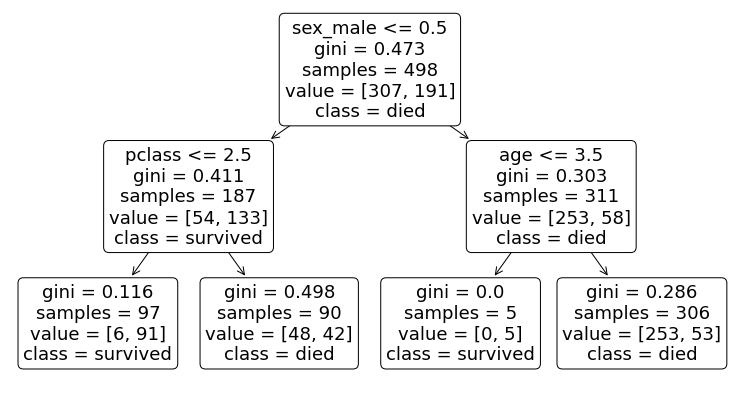

In [25]:
survived = np.array(['died', 'survived'])

plt.figure(figsize = (13,7))
plot_tree(clf2, feature_names = X_train.columns, class_names = survived, rounded = True)

In [26]:
y_pred2 = clf2.predict(X_train)
y_pred2[0:5]

array([0, 1, 1, 1, 0])

In [27]:
pd.DataFrame(confusion_matrix(y_train, y_pred2))

,0,1
0,301,6
1,95,96


In [28]:
#Defining true/false positive and true/false negative:

tn, fp, fn, tp = confusion_matrix(y_train, y_pred2).ravel()

tn, fp, fn, tp

(301, 6, 95, 96)

In [29]:
#Accuracy:

accuracy = accuracy_score(y_train, y_pred2)
accuracy

0.7971887550200804

In [30]:
#True Positive Rate:

tp / (tp + fp)

0.9411764705882353

In [31]:
#False Positive Rate:
fp / (tp + fp)

0.058823529411764705

In [32]:
#True Negative Rate:
tn / (tn + fn)

0.76010101010101

In [33]:
#False Negative Rate:
fn / (tn + fn)

0.2398989898989899

In [34]:
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred2)

print(f"Precision is {precision[1]}.")
print(f"Recall is {recall[1]}.")
print(f"Fscore is {fscore[1]}.")
print(f"Support is {support[1]}.")

Precision is 0.9411764705882353.
Recall is 0.5026178010471204.
Fscore is 0.6552901023890785.
Support is 191.


## 6. Which model performs better on your in-sample data?

In [35]:
y_validate_pred = clf2.predict(X_validate)
y_validate_pred[0:5]

array([0, 0, 0, 0, 0])

In [36]:
precision, recall, fscore, support = precision_recall_fscore_support(y_validate, y_validate_pred)

print(f"Precision is {precision}.")
print(f"Recall is {recall}.")
print(f"Fscore is {fscore}.")
print(f"Support is {support}.")

Precision is [0.76428571 0.92307692].
Recall is [0.97272727 0.52173913].
Fscore is [0.856      0.66666667].
Support is [110  69].


The nature of the potential loss of human life in this situation brings up ethical considerations, such that saying "we're 92% sure we're correct if we predict you're going to live" is not as ethical as focusing on recall to avoid false positives. 

The second model is better at avoiding false positives, wherein we predict someone would survive but they don't. Therefore the second model is better. 

## 7. Extra: Which model performs best on your out-of-sample data, the validate set?

In [37]:
y_validate_pred = clf2.predict(X_validate)
y_validate_pred[0:5]

array([0, 0, 0, 0, 0])

In [38]:
precision, recall, fscore, support = precision_recall_fscore_support(y_validate, y_validate_pred)

print(f"Precision is {precision}.")
print(f"Recall is {recall}.")
print(f"Fscore is {fscore}.")
print(f"Support is {support}.")

Precision is [0.76428571 0.92307692].
Recall is [0.97272727 0.52173913].
Fscore is [0.856      0.66666667].
Support is [110  69].


The nature of the potential loss of human life in this situation brings up ethical considerations, such that saying "we're 92% sure we're correct if we predict you're going to live" is not as ethical as focusing on recall to avoid false positives. 

The second model is better at avoiding false positives, wherein we predict someone would survive but they don't. Therefore the second model is better. 

## 8. Extra: Work through these same exercises using the Telco dataset.

In [39]:
#This is an extra exercise. 

# Random Forest Exercises:

In [40]:
titanic_df = acquire.get_titanic_data()
train, test, validate = prepare.prep_titanic_data(titanic_df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [41]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [42]:
rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, random_state = 123)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [44]:
print(rf.feature_importances_)

[0.11075012 0.22550766 0.04483811 0.04374031 0.23516332 0.01387358
 0.28374669 0.01363862 0.0287416 ]


In [45]:
y_pred = rf.predict(X_train)

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [46]:
print('The accuracy of the random forest model on the training set is {:.2f}'.format(rf.score(X_train, y_train)))

The accuracy of the random forest model on the training set is 0.97


In [47]:
print(confusion_matrix(y_train, y_pred))

[[305   2]
 [ 15 176]]


In [48]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       307
           1       0.99      0.92      0.95       191

    accuracy                           0.97       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.97      0.97      0.97       498



## 3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [49]:
# Accuracy: 

print('The accuracy of the random forest model on the training set is {:.2f}'.format(rf.score(X_train, y_train)))

The accuracy of the random forest model on the training set is 0.97


In [50]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

total = tn + fp + fn + tp

In [51]:
# True Positive Rate:
tp / total

0.3534136546184739

In [52]:
# False Positive Rate:
fp / total

0.004016064257028112

In [53]:
# True Negative Rate:

tn / total

0.6124497991967871

In [54]:
# False Negative Rate:

fn / total

0.030120481927710843

In [55]:
# Precision: 

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred)
precision

# Precision if you guess someone dies is .95

array([0.953125  , 0.98876404])

In [56]:
# Recall:

recall

# Recall is you guess someone dies is .99

array([0.99348534, 0.92146597])

In [57]:
# F-1 Score:
fscore

# F-Score if you guess someone dies is .97

array([0.97288676, 0.95392954])

In [58]:
# Support: 

support

#There are 307 instances of support for a guess that someone dies, and 191 instances of support for a guess that someone lives. 

array([307, 191])

### I need to go through and add a loop to the above portion as well.

## 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [59]:
for i in range(2, 21):
    # Make the model
    forest = RandomForestClassifier(max_depth = 21 - i, min_samples_leaf = i, random_state = 123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Min Leaf of {11 - i}")
    print(f"Forest with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Min Leaf of 9
Forest with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.918495    0.921788  0.919679    0.920142      0.919758
recall       0.954397    0.863874  0.919679    0.909136      0.919679
f1-score     0.936102    0.891892  0.919679    0.913997      0.919146
support    307.000000  191.000000  0.919679  498.000000    498.000000

Min Leaf of 8
Forest with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.888218    0.922156  0.899598    0.905187      0.901234
recall       0.957655    0.806283  0.899598    0.881969      0.899598
f1-score     0.921630    0.860335  0.899598    0.890983      0.898121
support    307.000000  191.000000  0.899598  498.000000    498.000000

Min Leaf of 7
Forest with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.863905    0.906250   0.87751    0.885078      0.880146
recall       0.951140    0.759162  

In [60]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth = depth, min_samples_leaf = n_samples, random_state = 123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    
    output = {
        "min_samples_per_leaf" : n_samples,
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    metrics.append(output)

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.921687,0.798883,0.122804
1,3,3,0.899598,0.821229,0.078369
2,4,4,0.877510,0.804469,0.073041
3,5,5,0.871486,0.804469,0.067017
4,6,6,0.857430,0.810056,0.047374
5,7,7,0.861446,0.810056,0.051390
6,8,8,0.847390,0.804469,0.042920
7,9,9,0.847390,0.810056,0.037334
8,10,10,0.839357,0.815642,0.023715
9,11,11,0.831325,0.810056,0.021269


In [62]:
rf2 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, random_state = 123)
rf2

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=123)

In [63]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=123)

In [64]:
print(rf2.feature_importances_)

[0.1548459  0.13208028 0.04361279 0.0382733  0.14291453 0.00788892
 0.43860878 0.01164912 0.03012639]


In [65]:
y_pred2 = rf2.predict(X_train)

In [66]:
print('The accuracy of the second random forest model on the training set is {:.2f}'.format(rf2.score(X_train, y_train)))

The accuracy of the second random forest model on the training set is 0.86


In [67]:
print(confusion_matrix(y_train, y_pred2))

[[296  11]
 [ 58 133]]


In [68]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       307
           1       0.92      0.70      0.79       191

    accuracy                           0.86       498
   macro avg       0.88      0.83      0.84       498
weighted avg       0.87      0.86      0.86       498



In [69]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred2).ravel()

total = tn + fp + fn + tp

In [70]:
# True Positive Rate:
tp / total

0.26706827309236947

In [71]:
# False Positive Rate:
fp / total

0.02208835341365462

In [72]:
# True Negative Rate:

tn / total

0.5943775100401606

In [73]:
# False Negative Rate:

fn / total

0.11646586345381527

In [74]:
# Precision: 

precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred2)
precision

# Precision if you guess someone dies is .83

array([0.83615819, 0.92361111])

In [75]:
# Recall:

recall

# Recall is you guess someone dies is .96

array([0.96416938, 0.69633508])

In [76]:
# F-1 Score:
fscore

# F-Score if you guess someone dies is .90

array([0.89561271, 0.79402985])

In [77]:
# Support: 

support

#There are 307 instances of support for a guess that someone dies, and 191 instances of support for a guess that someone lives.

array([307, 191])

## 5. What are the differences in the evaluation metrics?  Which performs better on your in-sample data? Why?

# KNN Exercises:

In [78]:
titanic_df = acquire.get_titanic_data()
train, test, validate = prepare.prep_titanic_data(titanic_df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [79]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

## 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [80]:
#Creating the (empty) model object:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Fitting the model to training data:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
#Classifying each passenger by whether they are expected to survive:
y_pred = knn.predict(X_train)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [82]:
# Viewing probability of survival or death, for each passenger in the training set:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8,

## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [83]:
accuracy_score(y_train, y_pred)

0.7771084337349398

In [84]:
# Model Score:

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [85]:
print(confusion_matrix(y_train, y_pred))

[[257  50]
 [ 61 130]]


In [86]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       307
           1       0.72      0.68      0.70       191

    accuracy                           0.78       498
   macro avg       0.77      0.76      0.76       498
weighted avg       0.78      0.78      0.78       498



## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [87]:
# Model Score:

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.78


In [88]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

total = tn + fp + fn + tp

In [89]:
# True Positive Rate:
tp / total

0.26104417670682734

In [90]:
# False Positive Rate:
fp / total

0.10040160642570281

In [91]:
# True Negative Rate:

tn / total

0.5160642570281124

In [92]:
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred)
precision[1]

0.7222222222222222

In [93]:
recall[1]

0.680628272251309

In [94]:
fscore[1]

0.7008086253369272

In [95]:
support[1]

191

## 4. Run through steps 2-4 setting k to 10

In [96]:
#Creating the (empty) model object:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

#Fitting the model to training data:
knn2.fit(X_train, y_train)

#True
y_pred2 = knn2.predict(X_train)
y_pred2

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [97]:
#Calculating true/false negatives/positives:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred2).ravel()
total = tn + fp + fn + tp

tp_rate = tp / total
tn_rate = tp / total
fp_rate = fp / total
fn_rate = fn / total

print(f"True Positive: {tp_rate} \nTrue Negative: {tn_rate} \nFalse Positive: {fp_rate} \nFalse Negative: {fn_rate} ")

True Positive: 0.19477911646586346 
True Negative: 0.19477911646586346 
False Positive: 0.07630522088353414 
False Negative: 0.18875502008032127 


In [98]:
print('Accuracy of the second KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))

Accuracy of the second KNN classifier on training set: 0.73


In [99]:
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred2)
precision[1]

0.7185185185185186

In [100]:
recall[1]

0.5078534031413613

In [101]:
fscore[1]

0.5950920245398773

In [102]:
support[1]

191

## 5. Run through setps 2-4 setting k to 20

In [103]:
#Creating the (empty) model object:
knn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

#Fitting the model to training data:
knn3.fit(X_train, y_train)

#True
y_pred3 = knn3.predict(X_train)
y_pred3

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
#Calculating true/false negatives/positives:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred3).ravel()
total = tn + fp + fn + tp

tp_rate = tp / total
tn_rate = tp / total
fp_rate = fp / total
fn_rate = fn / total

print(f"True Positive: {tp_rate} \nTrue Negative: {tn_rate} \nFalse Positive: {fp_rate} \nFalse Negative: {fn_rate} ")

True Positive: 0.1706827309236948 
True Negative: 0.1706827309236948 
False Positive: 0.07228915662650602 
False Negative: 0.21285140562248997 


In [105]:
print('Accuracy of the second KNN classifier on training set: {:.2f}'
     .format(knn3.score(X_train, y_train)))

Accuracy of the second KNN classifier on training set: 0.71


In [106]:
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_pred3)
precision[1]

0.7024793388429752

In [107]:
recall[1]

0.44502617801047123

In [108]:
fscore[1]

0.5448717948717948

In [109]:
support[1]

191

## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

## 7. Which model performs best on our out-of-sample data from validate?

# Logistic Regression Exercises:

In [110]:
titanic_df = acquire.get_titanic_data()
train, test, validate = prepare.prep_titanic_data(titanic_df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


In [119]:
train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99,0,2,34.000000,1,0,26.0000,0,1,0,1
349,0,3,42.000000,0,0,8.6625,1,1,0,1
546,1,2,19.000000,1,0,26.0000,0,0,0,1
107,1,3,30.189296,0,0,7.7750,1,1,0,1


In [131]:
X_train = train[['age', 'fare', 'pclass']]
y_train = train.survived

X_validate = validate[['age', 'fare', 'pclass']]
y_validate = validate.survived

X_test = test[['age', 'fare', 'pclass']]
y_test = test.survived

## 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [145]:
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')

In [146]:
logit.fit(X_train, y_train)
LogisticRegression(C=1, random_state=123)

LogisticRegression(C=1, random_state=123)

In [147]:
#Determine importance of each of the features:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.03949301  0.00372404 -0.95167944]]
Intercept: 
 [2.76877296]


In [148]:
#Make Predictions:
y_pred = logit.predict(X_train)

In [149]:
#Estimate Probabiliity:
y_pred_proba = logit.predict_proba(X_train)

In [150]:
#Calculate Model Accuracy:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.70


In [151]:
#Create a confusion matrix:
print(confusion_matrix(y_train, y_pred))

[[267  40]
 [110  81]]


In [152]:
#Creating a classification report:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.67      0.42      0.52       191

    accuracy                           0.70       498
   macro avg       0.69      0.65      0.65       498
weighted avg       0.69      0.70      0.68       498



## 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

## 3. Try out other combinations of features and models.

## 4. Use you best 3 models to predict and evaluate on your validate sample.

## 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?